In [56]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
from pandas import *
from pandas import Series, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import os

In [57]:
df=pd.read_csv('D:\\Python Projects\\MPG\\Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [58]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [59]:
df.dtypes #Data types of Variables
#Horsepower type is object so it has got dummy/missing data

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [60]:
#Convert Horsepower to int
for rowNum, colName in df.horsepower.iteritems():
    if colName.isdigit() == False:
        df.horsepower[rowNum]=120
df.horsepower=df.horsepower.astype(np.int64)

D:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [61]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.767061,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.835668,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.889533,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.767061,0.835668,0.889533,1.000000,0.856230,-0.684240,-0.410925,-0.454608
weight,-0.831739,0.897017,0.933104,0.856230,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.684240,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.410925,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.454608,-0.581265,0.210084,0.184314,1.000000


In [62]:
#Remove displacement and cylinders as they are highly correlated with horsepower
df.drop('displacement',axis=1, inplace=True)
df.drop('weight',axis=1,inplace=True)
df.dtypes

mpg             float64
cylinders         int64
horsepower        int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

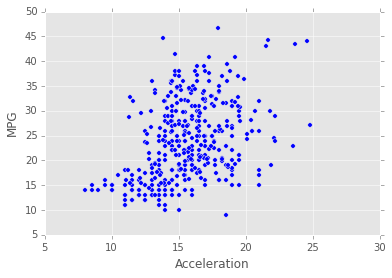

In [65]:
plt.scatter(df.acceleration,df.mpg,)
plt.xlabel('Acceleration')#Labeling
plt.ylabel('MPG')

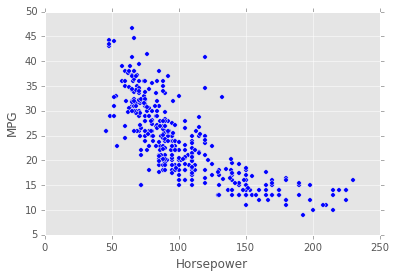

In [66]:
plt.scatter(df.horsepower,df.mpg,)
plt.xlabel('Horsepower')#Labeling
plt.ylabel('MPG')

{'boxes': [<matplotlib.lines.Line2D at 0x19e47d68>,
 'caps': [<matplotlib.lines.Line2D at 0x19e9dac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x19ea8b70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x19ea85f8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x19e47f28>,
  <matplotlib.lines.Line2D at 0x19edc2b0>]}

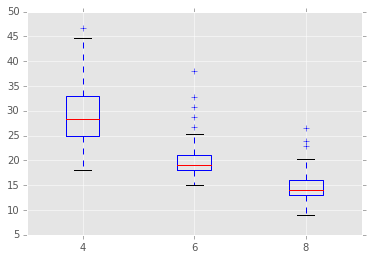

In [68]:
plt.cla()
plt.boxplot([[df.mpg[df.cylinders==4]],[df.mpg[df.cylinders==6]],
             [df.mpg[df.cylinders==8]]],
           labels=('4','6','8'))

### Split into Training and Testing

In [75]:
predictors=df[['cylinders','horsepower','acceleration','year']]
target=df.mpg
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,target,test_size=.3)

In [77]:
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(120L,)

In [78]:
tar_train.shape

(277L,)

In [80]:
model=LinearRegression()
model.fit(pred_train,tar_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
predictions=model.predict(pred_test)
predictions

array([ 21.58833394,  28.18820181,  32.53011681,  19.67527179,
        14.52829502,  12.28627612,  16.57906365,  11.91361169,
        14.39359199,  29.70799446,  21.97212537,  14.15627604,
        19.83062817,  32.72814139,  28.6967    ,  31.81617428,
        25.25996245,  15.08201029,  27.19345415,  24.47839731,
        20.41653009,  20.95845756,  14.13574994,  13.40099918,
        29.91945577,  30.43510695,  32.46039962,  15.23788487,
        28.40200802,  30.52101291,  23.74601991,  23.9211933 ,
        12.49806784,  20.8339693 ,  31.15609057,  22.3559168 ,
        26.46153997,  23.55515501,  24.25725477,  20.77768884,
        11.40677779,  14.08886858,  26.73132471,  33.13531756,
        31.1042747 ,  28.54436243,  25.87688737,  24.87290079,
        22.72649   ,  27.46533011,  26.74407971,  30.45005309,
        30.62582366,  26.89146741,  13.14260823,  32.23361349,
        28.60145857,  14.23534406,  29.29286497,  27.27497896,
        22.31049657,  24.40036011,  31.07584356,  32.33

In [84]:
print('R-Squared valu for the model is:',model.score(pred_test,tar_test))

('R-Squared valu for the model is:', 0.75184610755552594)


In [85]:
sklearn.metrics.r2_score(tar_test,predictions)#Alternate way

0.75184610755552594

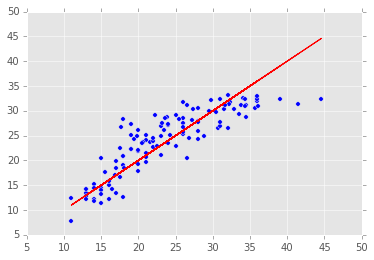

In [92]:
plt.plot(tar_test,tar_test,c='r')#100% accurate prediction
plt.scatter(tar_test,predictions) #ideal should be close to the line

In [95]:
model.predict([4,71,16.5,75]) #Prediction using sample data

array([ 28.00645725])